<a href="https://colab.research.google.com/github/chrisseiler96/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Copy_of_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

(-10, 10)

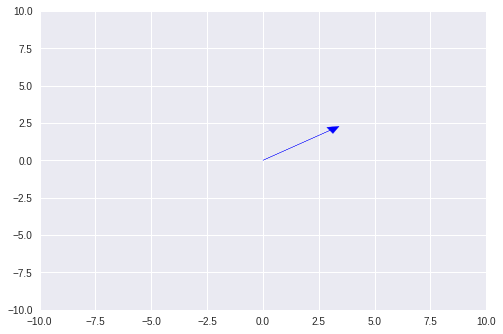

In [5]:
plt.arrow(0, 0, 3, 2, head_width=.5, head_length=0.5, color = 'b')
plt.xlim(-10,10)
plt.ylim(-10,10)

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [84]:
b = np.array([17,-4,-2,1])
np.linalg.norm(b, axis=0)

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [6]:
v1 = np.array([3,7,-2,12])
v2 = np.array([9,-7,4,6])
np.dot(v1,v2)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [7]:
E = np.array([[7,4,2],
              [1,3,-1],
              [2,6,-4]])



E.T

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

In [9]:
np.linalg.inv(E)

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [10]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [0]:
##### Your Code Here #####


def get_mean(data):
  sum = 0
  for i in data:
    sum += i
  return (sum/len(data))

def get_var(data):
  mean = get_mean(data)
  varsum = 0
  for j in data:
    varsum += (j - mean)**2
  return (varsum / (len(data) - 1))

def get_std(data):
  return get_var(data)**0.5


In [16]:
get_mean(df.customers)

1135.7142857142858

In [21]:
get_var(df.customers)

98761.90476190478

In [22]:
get_std(df.customers)

314.26406851866597

In [23]:
get_mean(df.snow)

2.7142857142857144

In [24]:
get_var(df.snow)

8.571428571428571

In [25]:
get_std(df.snow)

2.9277002188455996

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

The customers data has a higher variance but I believe the relative variance is actually pretty similar

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [26]:
np.cov(customers,snow)

array([[9.87619048e+04, 6.70238095e+02],
       [6.70238095e+02, 8.57142857e+00]])

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [36]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [0]:
Y = df.Country

In [38]:
# Only numeric columns in dataframe for pasing to PCA

X = df.drop('Country', axis=1)
X.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


In [39]:
# We'll also turn the X dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_X = X.values
print(numpy_X)

[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]]


### 1) Separate your data into X and Y, variables.



In [31]:
df.columns

Index(['Alcoholic Drinks', 'Beverages', 'Carcass_Meat', 'Cereals', 'Cheese',
       'Confectionery', 'Country', 'Fats_and_Oils', 'Fish', 'Fresh_Fruit',
       'Fresh_Potatoes', 'Fresh_Veg', 'Other_Meat', 'Other_Veg',
       'Processed_Potatoes', 'Processed_Veg', 'Soft_Drinks', 'Sugars'],
      dtype='object')

In [40]:
X.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


In [41]:
Y.head()

0          England
1            Wales
2         Scotland
3    North Ireland
Name: Country, dtype: object

### 2) Center each X column at 0 by subtracting its mean.




In [42]:
means = np.mean(X.T, axis=1)
print("\n Means: \n", means)


 Means: 
 Alcoholic Drinks       360.75
Beverages               57.50
Carcass_Meat           245.25
Cereals               1502.50
Cheese                  94.25
Confectionery           55.25
Fats_and_Oils          205.25
Fish                   130.50
Fresh_Fruit            967.50
Fresh_Potatoes         798.25
Fresh_Veg              208.00
Other_Meat             706.00
Other_Veg              457.75
Processed_Potatoes     202.00
Processed_Veg          349.00
Soft_Drinks           1427.00
Sugars                 154.25
dtype: float64


In [43]:
stds = np.std(X.T, axis=1)
print("\n stds: \n", stds)


 stds: 
 Alcoholic Drinks      135.717307
Beverages               9.630680
Carcass_Meat           14.289419
Cereals                47.336561
Cheese                 16.330569
Confectionery           9.038114
Fats_and_Oils          19.369757
Fish                   25.597851
Fresh_Fruit           182.395861
Fresh_Potatoes        173.859678
Fresh_Veg              52.124850
Other_Meat             80.910444
Other_Veg              80.082379
Processed_Potatoes     11.895377
Processed_Veg          13.656500
Soft_Drinks           121.774382
Sugars                 13.404757
dtype: float64


In [44]:
centered_data = (X - means) / stds
print("\n Centered Data: \n", centered_data)


 Centered Data: 
    Alcoholic Drinks  Beverages  Carcass_Meat   Cereals    Cheese  \
0          0.104998  -0.051917     -0.017495 -0.644322  0.658275   
1          0.841823   1.609440     -1.277169  1.679463  0.535805   
2          0.716563  -0.467257     -0.227441 -0.855575  0.535805   
3         -1.663384  -1.090266      1.522105 -0.179565 -1.729885   

   Confectionery  Fats_and_Oils      Fish  Fresh_Fruit  Fresh_Potatoes  \
0      -0.138303      -0.632429  0.644585     0.737407       -0.450076   
1       0.968122       1.535899  1.152440     0.929297        0.435696   
2       0.746837      -1.097071 -0.332059    -0.057567       -1.335847   
3      -1.576656       0.193601 -1.464967    -1.609137        1.350227   

   Fresh_Veg  Other_Meat  Other_Veg  Processed_Potatoes  Processed_Veg  \
0   0.863312   -0.259546   0.377736           -0.336265       0.805477   
1   1.093528    1.198856   1.401682            0.084066       1.171603   
2  -0.709834    0.543811  -0.496364            

In [46]:
centered_data.describe()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
count,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000,4.000000,4.000000e+00,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000e+00
mean,0.000000,-5.551115e-17,0.000000,6.938894e-18,0.000000,5.551115e-17,6.938894e-18,0.000000,0.000000,0.000000,5.551115e-17,0.000000,0.000000,0.000000,-5.551115e-17,-2.775558e-17,-5.551115e-17
std,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701,1.154701,1.154701e+00,1.154701,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701e+00
min,-1.663384,-1.090266e+00,-1.277169,-8.555755e-01,-1.729885,-1.576656e+00,-1.097071e+00,-1.464967,-1.609137,-1.335847,-1.247006e+00,-1.483121,-1.283054,-1.260994,-1.098378e+00,-1.404236e+00,-1.137656e+00
25%,-0.337098,-6.230090e-01,-0.489873,-6.971356e-01,-0.030617,-4.978915e-01,-7.485897e-01,-0.615286,-0.445460,-0.671519,-8.441271e-01,-0.565440,-0.693036,-0.567447,-9.336213e-01,-6.774824e-01,-6.900536e-01
50%,0.410780,-2.595871e-01,-0.122468,-4.119437e-01,0.535805,3.042670e-01,-2.194142e-01,0.156263,0.339920,-0.007190,7.673883e-02,0.142132,-0.059314,-0.126099,-3.661260e-02,1.067548e-01,-2.051511e-01
75%,0.747878,3.634219e-01,0.367405,2.851918e-01,0.566422,8.021585e-01,5.291754e-01,0.771549,0.785380,0.664329,9.208660e-01,0.707572,0.633722,0.441348,8.970087e-01,7.842372e-01,4.849025e-01
max,0.841823,1.609440e+00,1.522105,1.679463e+00,0.658275,9.681224e-01,1.535899e+00,1.152440,0.929297,1.350227,1.093528e+00,1.198856,1.401682,1.513193,1.171603e+00,1.190727e+00,1.547958e+00


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [55]:
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA

print("Data: \n", X)

pca = PCA(n_components=2)

pca.fit(X)

print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

B = pca.transform(X)
print("\n Projected Data: \n", B)

Data: 
    Alcoholic Drinks  Beverages  Carcass_Meat  Cereals  Cheese  Confectionery  \
0               375         57           245     1472     105             54   
1               475         73           227     1582     103             64   
2               458         53           242     1462     103             62   
3               135         47           267     1494      66             41   

   Fats_and_Oils  Fish  Fresh_Fruit  Fresh_Potatoes  Fresh_Veg  Other_Meat  \
0            193   147         1102             720        253         685   
1            235   160         1137             874        265         803   
2            184   122          957             566        171         750   
3            209    93          674            1033        143         586   

   Other_Veg  Processed_Potatoes  Processed_Veg  Soft_Drinks  Sugars  
0        488                 198            360         1374     156  
1        570                 203            365         12

In [56]:
B_df = pd.DataFrame(B)

df_new = pd.concat([B_df,Y], axis=1)
print (len(df_new))

df_new.head()


4


,0,1,Country
0,-144.993152,-2.532999,England
1,-240.529148,-224.646925,Wales
2,-91.869339,286.081786,Scotland
3,477.391639,-58.901862,North Ireland


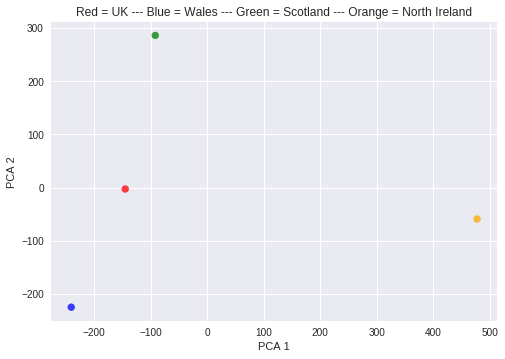

In [59]:


colors = {'England':'red', 'Wales':'blue', 'Scotland':'green', 'North Ireland':'orange'}
datacolor = df_new['Country'].apply(lambda x: colors[x]) #Map colors to Iris Species


plt.scatter(df_new[0], df_new[1], c=datacolor, alpha=0.75)


plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Red = UK --- Blue = Wales --- Green = Scotland --- Orange = North Ireland")
plt.show()


# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [61]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [62]:
points.shape

(200, 2)

In [0]:
# We'll also turn the dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_points = points.values
print(numpy_points)

[[ -7.84680264  -3.42127666]
 [ -3.55432332  -6.88472945]
 [ -0.19282234  -9.67103016]
 [ -6.40145554  -5.22397192]
 [ -0.8040258   -9.70445652]
 [ -4.9771936   -6.13883603]
 [ -8.11899027  -3.62410932]
 [ -8.1456292   -2.78795056]
 [ -3.56865911   5.40178102]
 [ -5.71170922  -6.80201318]
 [ -4.00606304  -7.99484628]
 [ -4.34701906  -7.07327411]
 [  0.02288488 -10.57220028]
 [ -4.65338805  -8.10057054]
 [ -8.26306683  -4.36478167]
 [ -1.78925444 -11.0957949 ]
 [ -7.56683375  -4.39166363]
 [ -3.00212691  -5.73856732]
 [ -2.57673872  -7.83223833]
 [  6.74057358   4.13730878]
 [ -7.96610489  -3.14997573]
 [  6.26556835   5.01331613]
 [  6.28517859   4.44708732]
 [  6.40527985   4.38379283]
 [ -2.68559499  -8.51265544]
 [ -5.28302702  -9.34170965]
 [  0.07097306 -10.11371322]
 [ -1.64051597   4.00264149]
 [ -4.60671171  -8.36655774]
 [ -4.6838594   -7.26710703]
 [ -3.16629032  -7.64623711]
 [ -2.56850303  -7.13484226]
 [ -0.09036863  -7.64228289]
 [  6.8415471    2.62542108]
 [ -6.41252467

In [0]:
from sklearn.cluster import KMeans

In [65]:
points.head(50)

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457
5,-4.977194,-6.138836
6,-8.118990,-3.624109
7,-8.145629,-2.787951
8,-3.568659,5.401781
9,-5.711709,-6.802013


In [68]:
points.isnull().sum()

x    0
y    0
dtype: int64

In [70]:

cluster = KMeans() #default 8 clusters
cluster.fit_predict(points)

array([4, 1, 3, 4, 3, 1, 4, 4, 5, 1, 7, 1, 3, 7, 4, 3, 4, 1, 6, 0, 4, 0,
       0, 0, 6, 7, 3, 2, 7, 1, 6, 6, 3, 0, 7, 1, 6, 1, 5, 3, 3, 0, 2, 5,
       5, 1, 6, 6, 4, 3, 0, 4, 4, 5, 0, 3, 1, 5, 5, 4, 0, 3, 4, 5, 0, 2,
       0, 2, 4, 5, 6, 1, 7, 7, 0, 0, 7, 7, 2, 0, 5, 1, 7, 1, 2, 6, 5, 6,
       7, 0, 2, 6, 0, 6, 3, 7, 6, 7, 6, 3, 6, 6, 4, 7, 1, 0, 4, 4, 4, 0,
       3, 0, 7, 4, 6, 1, 5, 2, 0, 5, 0, 3, 7, 4, 7, 4, 6, 0, 2, 4, 3, 4,
       7, 4, 5, 2, 3, 0, 4, 1, 2, 6, 7, 0, 3, 5, 6, 5, 4, 6, 7, 3, 4, 0,
       7, 5, 3, 0, 1, 4, 3, 6, 5, 4, 0, 0, 6, 2, 3, 3, 4, 3, 5, 0, 3, 6,
       1, 7, 1, 4, 1, 3, 1, 6, 3, 6, 4, 0, 5, 3, 6, 4, 0, 4, 7, 5, 0, 0,
       6, 3], dtype=int32)

In [0]:
k_range = range(2,11) 
k_means_var = [KMeans(n_clusters=k).fit(points) for k in k_range]
centroids = [X.cluster_centers_ for X in k_means_var]

In [0]:
from scipy.spatial import distance
k_dist = [distance.cdist(points, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_dist]
wcss = [sum(d**2) for d in dist]

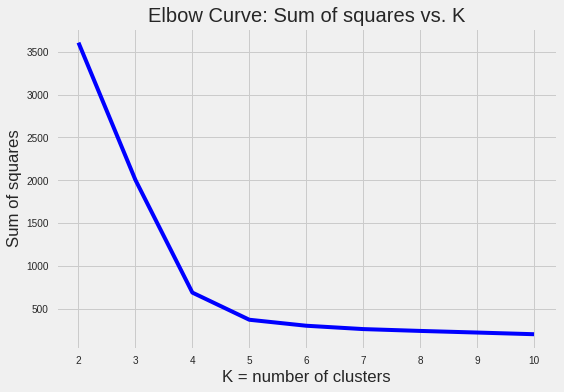

In [74]:
import matplotlib.style as style
style.use("fivethirtyeight")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, wcss, 'b-') #y axis is WCSS, x-axis is k_range
plt.grid(True)
plt.xlabel('K = number of clusters')
plt.ylabel('Sum of squares')
plt.title('Elbow Curve: Sum of squares vs. K')

plt.show()

### K should be either 4 or 5

Text(0.5,1,'Number of points in each cluster for k=4')

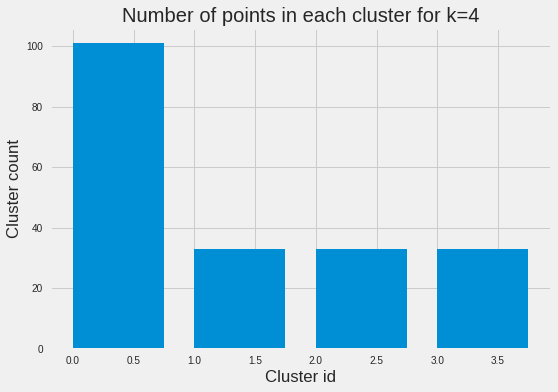

In [76]:
# 4 clusters

kmeans = KMeans(n_clusters=4) #K=8 is the assumed elbow point.
clusters = kmeans.fit_predict(points)

import numpy as np
cluster_value_counts = np.unique(clusters,return_counts=True)

cluster_ids =  list((cluster_value_counts)[0])
cluster_counts = list((cluster_value_counts)[1])

plt.bar(cluster_ids, cluster_counts, align='edge', width = 0.75)



plt.minorticks_on
plt.ylabel('Cluster count')
plt.xlabel('Cluster id')
plt.title('Number of points in each cluster for k=4')

Text(0.5,1,'Number of points in each cluster for k=5')

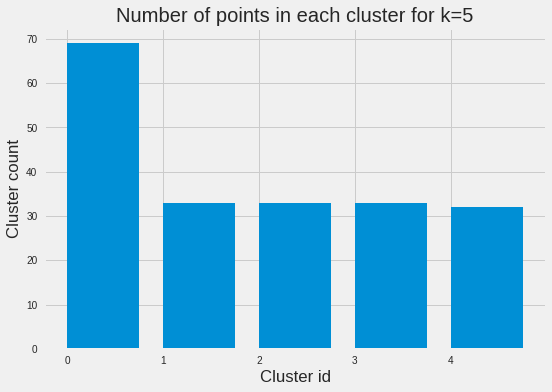

In [78]:
# 5 clusters

kmeans = KMeans(n_clusters=5) #K=8 is the assumed elbow point.
clusters = kmeans.fit_predict(points)

import numpy as np
cluster_value_counts = np.unique(clusters,return_counts=True)

cluster_ids =  list((cluster_value_counts)[0])
cluster_counts = list((cluster_value_counts)[1])

plt.bar(cluster_ids, cluster_counts, align='edge', width = 0.75)



plt.minorticks_on
plt.ylabel('Cluster count')
plt.xlabel('Cluster id')
plt.title('Number of points in each cluster for k=5')

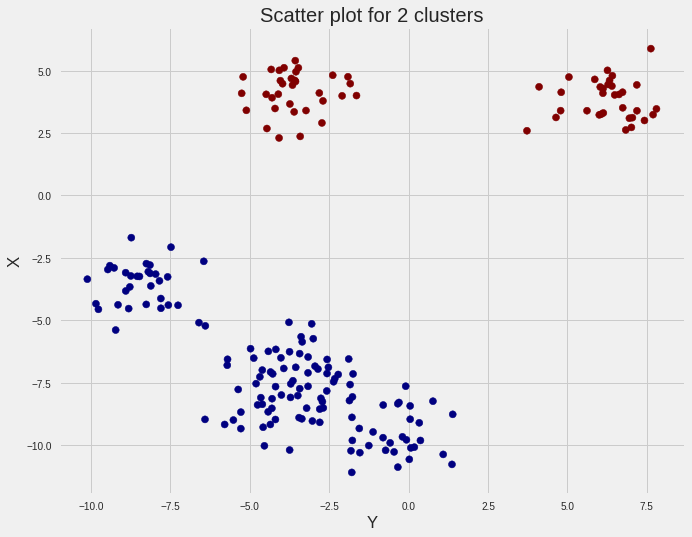

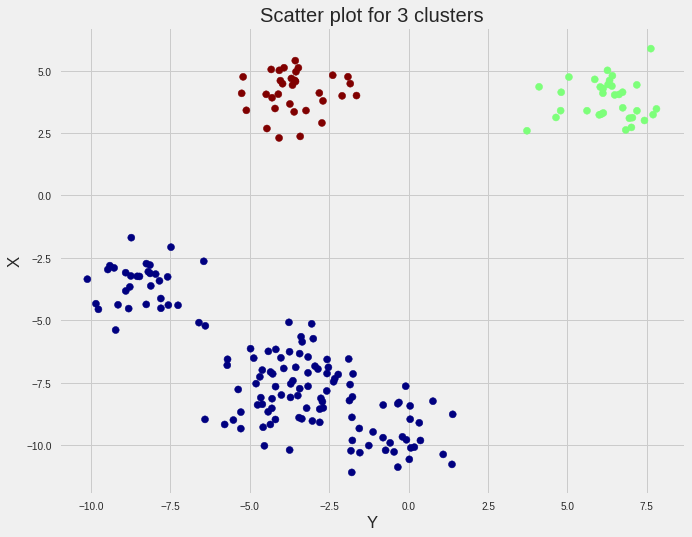

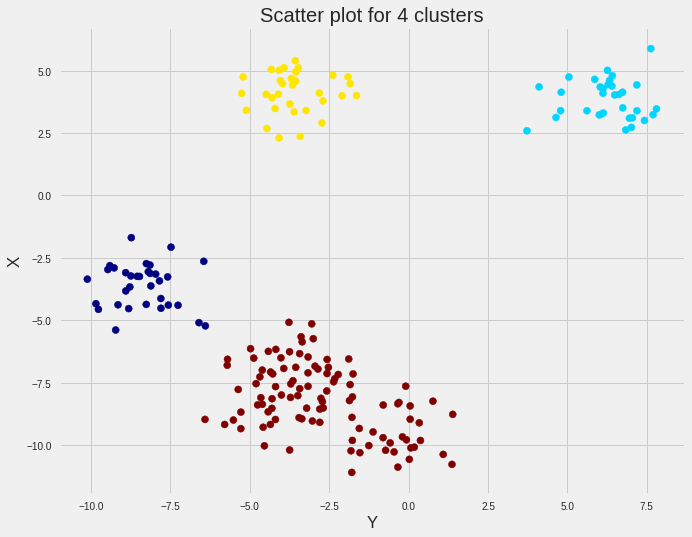

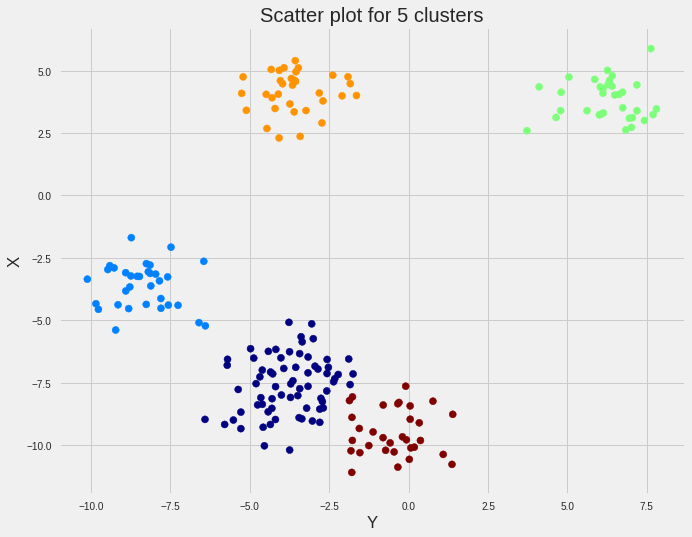

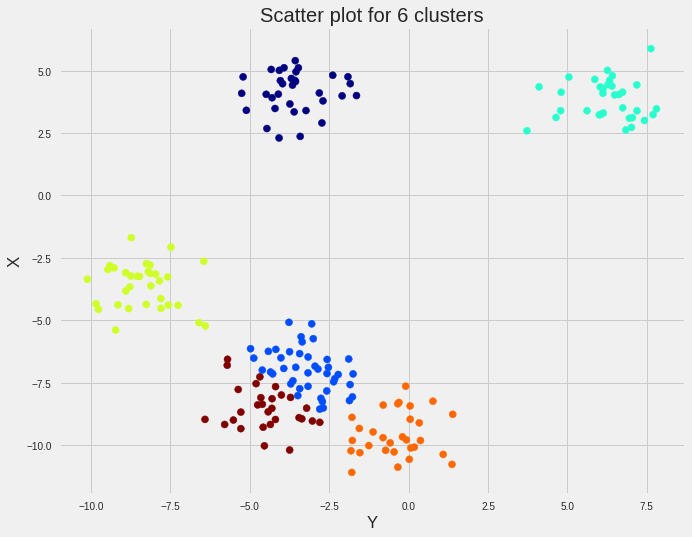

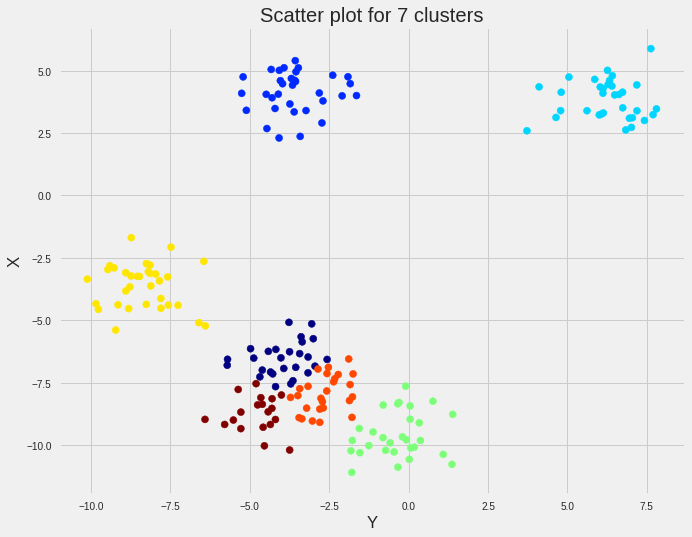

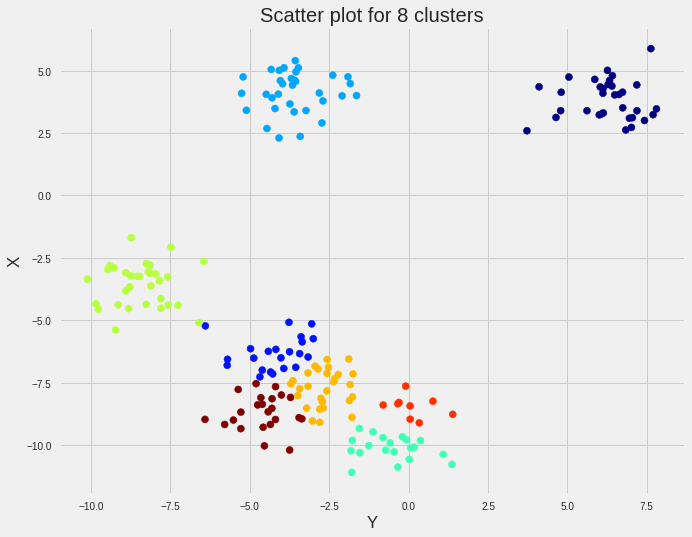

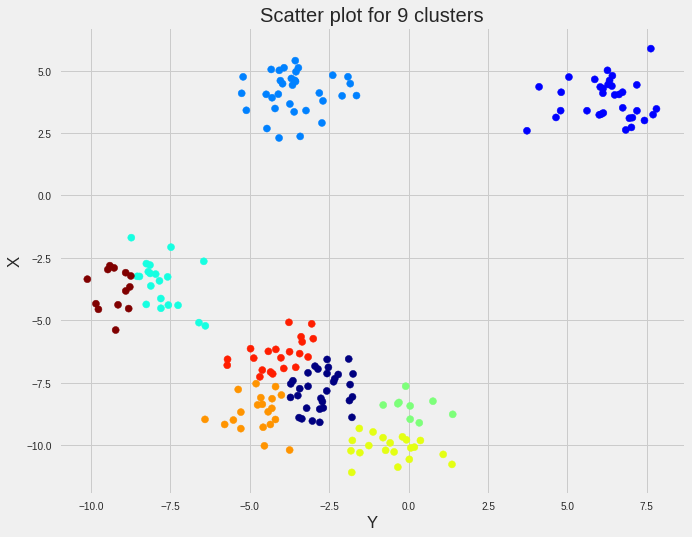

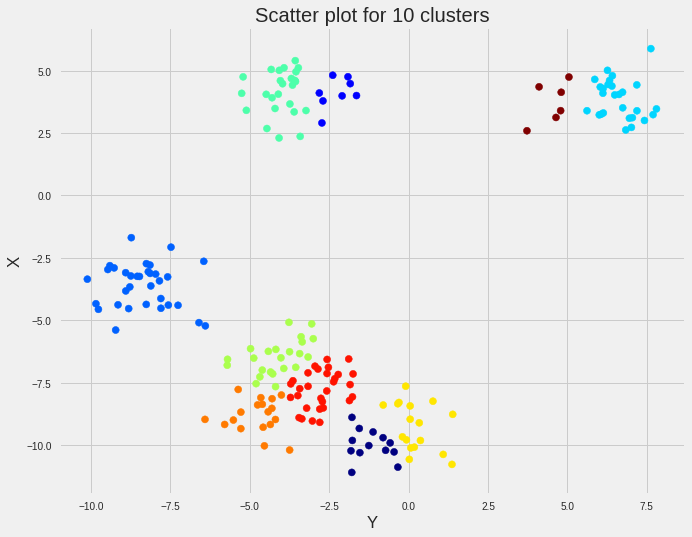

In [79]:
for n_clusters in k_range:
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    fig.set_size_inches(10, 8)
    kmeanscluster = KMeans(n_clusters=n_clusters, random_state=10)
    points['cluster'] = kmeanscluster.fit_predict(points)
 
    ax1.scatter(points['x'],points['y'], c=points['cluster'], cmap='jet')
    ax1.set_xlabel("Y")
    ax1.set_ylabel("X")
    ax1.set_title("Scatter plot for {} clusters".format(n_clusters))
    plt.show()
    
    del points['cluster']